# Supervised Learning - Artificial Intelligence

## Students' Dropout and Success

### Notebook by Henrique Pinho, João Lopes and Luís Marques

## Introduction

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

In this notebook, we will be using Supervised learning to predict if a student graduates or dropout.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [103]:
student_data = pd.read_csv('data.csv', delimiter=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [109]:
enrolled = student_data[student_data.Target == "Enrolled"].drop(columns=['Target'])
graduated = student_data[student_data.Target == "Graduate"].drop(columns=['Target'])
dropout = student_data[student_data.Target == "Dropout"].drop(columns=['Target'])

In [ ]:
enrolled_dict = enrolled.sum().to_dict()
plt.title('Enrolled')
plt.barh(list(enrolled_dict.keys()), list(enrolled_dict.values()))

In [ ]:
graduated_dict = graduated.sum().to_dict()
plt.title('Graduated')
print(list(graduated_dict.values()))
plt.barh(graduated_dict.keys(), graduated_dict.values())

<BarContainer object of 3 artists>

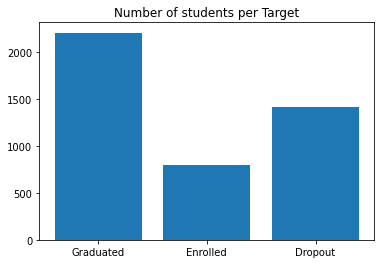

In [110]:
plt.title('Number of students per Target')
plt.bar(['Graduated', 'Enrolled', 'Dropout'], [len(graduated), len(enrolled), len(dropout)])

In [104]:
student_data.drop(student_data[student_data['Target'] == 'Enrolled'].index, inplace=True)
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [105]:
graduate_data = student_data[student_data.Target == 'Graduate']
graduate_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,...,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,1.134903,15.018108,1.851064,8917.248076,0.909009,4.031236,134.082707,1.745134,19.311453,22.499774,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833
std,0.525526,16.627271,1.395516,1919.444837,0.287662,9.805602,13.342121,5.790637,15.590923,15.225751,...,0.589686,2.211709,2.297197,3.245912,2.268622,2.685608,0.522872,2.601474,1.371116,2.261081
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,7.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,0.600000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [106]:
dropout_data = student_data[student_data.Target == 'Dropout']
dropout_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.261084,23.712878,1.593244,8755.629838,0.854328,5.311049,131.114075,1.957072,21.035186,22.683322,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
std,0.721958,17.150593,1.215769,2278.779477,0.352901,10.309934,12.873354,7.838977,15.523817,15.357099,...,0.794591,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210,2.768259,1.404970,2.251768
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,7.000000,1.000000,9085.000000,1.000000,1.000000,122.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,22.000000,...,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,137.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000,13.900000,2.600000,1.740000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,8.000000,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000,16.200000,3.700000,3.510000


In [107]:
graduate_sample = student_data.sample(n=1421, axis=0)
graduate_sample.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.173118,18.998593,1.748768,8886.650950,0.878255,4.654469,133.035327,2.042224,20.399719,22.942998,...,0.121745,0.634764,6.334975,7.840957,4.561576,10.111065,0.139338,11.627305,1.226108,-0.037270
std,0.589469,17.323964,1.329860,2003.939564,0.327106,10.278493,13.637777,7.367107,15.388741,15.296423,...,0.643460,2.220811,2.347992,4.112678,3.204076,5.389635,0.723066,2.704055,1.381253,2.266601
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,96.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.727273,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.272727,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,43.000000,...,12.000000,19.000000,23.000000,26.000000,20.000000,18.571429,7.000000,16.200000,3.700000,3.510000


In [108]:
student_data = pd.concat([graduate_sample, dropout_data])
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,...,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,1.217101,21.355735,1.671006,8821.140394,0.866291,4.982759,132.074701,1.999648,20.717452,22.813160,...,0.156932,0.542224,6.057706,7.507389,3.250880,8.005202,0.188600,11.621851,1.255032,-0.094064
std,0.660402,17.394964,1.276240,2146.387039,0.340399,10.297650,13.293507,7.605483,15.456973,15.324643,...,0.723714,1.970696,2.248120,4.490529,3.187562,6.137434,0.870517,2.735869,1.393217,2.259513
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,123.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,3.000000,11.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,6.000000,12.857143,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,26.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
/home/luis/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


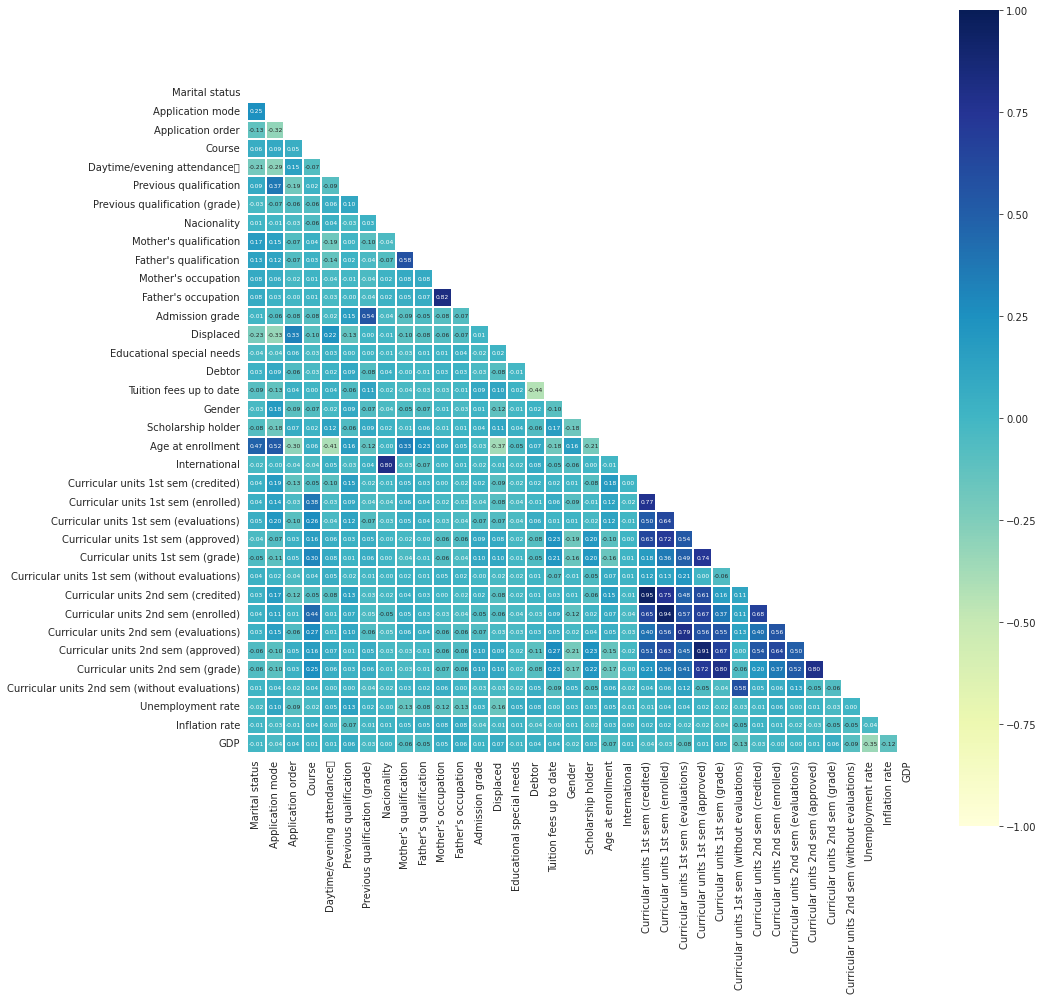

In [109]:
student_data_corr = student_data.corr()
mask = np.zeros_like(student_data_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sb.axes_style("white"):
    ax = sb.heatmap(student_data_corr, linewidths=0.1, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 6}, vmax=1, vmin=-1)
    plt.show()

In [110]:
student_data_corr = student_data.corr().abs()

upper = student_data_corr.where(np.triu(np.ones(student_data_corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

old_n_columns = len(student_data.columns)

student_data.drop(to_drop, axis=1, inplace=True)

print('Dropped ' + str(old_n_columns-len(student_data.columns)) + ' columns')

Dropped 3 columns


In [111]:
columns = student_data.columns

col_list = list(columns)

all_inputs = student_data[col_list[:-1]].values

all_labels = student_data['Target'].values

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)



In [119]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()


parameters = {'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [8],
            }



decision_tree_w_parameters = GridSearchCV(decision_tree_classifier,
                            param_grid=parameters)


decision_tree_w_parameters.fit(training_inputs, training_classes)

with open('decision_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_w_parameters.best_estimator_ , out_file=out_file)

decision_tree_w_parameters.score(testing_inputs, testing_classes)


0.8565400843881856